In [31]:
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
kagglehub.login()


In [49]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rjmanoj/credit-card-customer-churn-prediction",
"Churn_Modelling.csv"
)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18544\956478153.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [50]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [51]:
df.info()  # Display information about the DataFrame, including column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)  # Drop unnecessary columns

In [53]:
df['Exited'].value_counts()  # Count the number of customers who exited and those who did not

Exited
0    7963
1    2037
Name: count, dtype: int64

In [54]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)  # Convert categorical variables to dummy variables    

In [55]:
df.head()  # Display the first few rows of the DataFrame

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [47]:
df['Geography_Germany']=df['Geography_Germany'].astype(int) # Convert 'Geography_Germany' to integer type

In [56]:
from sklearn.model_selection import train_test_split
X= df.drop('Exited', axis=1)  # Features
Y= df['Exited']  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [61]:
Y_train.head()  # Display the first few rows of the target variable for training data

9254    0
1561    0
1670    1
6087    1
6669    1
Name: Exited, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scale = scaler.transform(X_test)  # Transform the test data using the same scaler


In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [92]:
model = Sequential()  # Initialize a sequential model
model.add(Dense(11, activation='relu', input_dim= 11))
model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons and ReLU activation
model.add(Dense(1, activation='relu'))  # Output layer with sigmoid activation for binary classification

a:\github\ML_DL_Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.summary()  # Display the model summary

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and binary crossentropy loss

In [99]:
his = model.fit(X_train_scale, Y_train, epochs=100, validation_split=0.2)  # Train the model

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8652 - loss: 0.3253 - val_accuracy: 0.8537 - val_loss: 0.4394
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8688 - loss: 0.3465 - val_accuracy: 0.8537 - val_loss: 0.4224
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8601 - loss: 0.3346 - val_accuracy: 0.8525 - val_loss: 0.4396
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8598 - loss: 0.3392 - val_accuracy: 0.8525 - val_loss: 0.4285
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8688 - loss: 0.3203 - val_accuracy: 0.8525 - val_loss: 0.4368
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8650 - loss: 0.3273 - val_accuracy: 0.8562 - val_loss: 0.4129
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8605 - loss: 0.3370 - val_accuracy: 0.8569 - val_loss: 0.4207
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8723 - loss: 0.3188 - val_ac

In [96]:
model.layers[1].get_weights()  # Get the weights of the first layer

[array([[-0.41331878,  0.48439854, -0.56425685, -0.27325445,  0.00630882,
          0.00421664, -0.05412705,  0.33296508],
        [-0.08779351,  0.07686859,  0.13015836, -0.44721794, -0.0441011 ,
         -0.37616235,  0.23570246, -0.21232894],
        [-0.15149157,  0.12183424,  0.62566864,  0.05282066,  0.30986694,
          0.12228531,  0.527803  ,  0.06301632],
        [-0.17479643, -0.35843483, -0.5124683 ,  0.4056162 ,  0.43605584,
         -0.19115129,  0.30974978,  0.41664428],
        [ 0.10943234,  0.3039314 , -1.0400183 ,  0.29973736,  0.11677932,
         -0.00607728, -0.19877847,  0.09845217],
        [ 0.49604878, -0.34538713,  0.09937295, -0.12568505, -0.30707532,
          0.6304699 , -0.26070315,  0.08860183],
        [-0.57699907,  0.26150143, -0.42821372, -0.2895855 , -0.07374726,
          0.11832862, -0.45582077, -0.01130933],
        [-0.07334767, -0.6015405 ,  0.4512084 ,  0.12220285, -0.04370519,
         -0.44297028,  0.3609668 , -0.5996552 ],
        [ 0.4187

In [97]:
y_pre = (model.predict(X_test_scale) > 0.5).astype(int)  # Make predictions on the test data as 0 or 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pre)  # Calculate the accuracy of the model

0.8565

Text(0.5, 1.0, 'Model Accuracy')

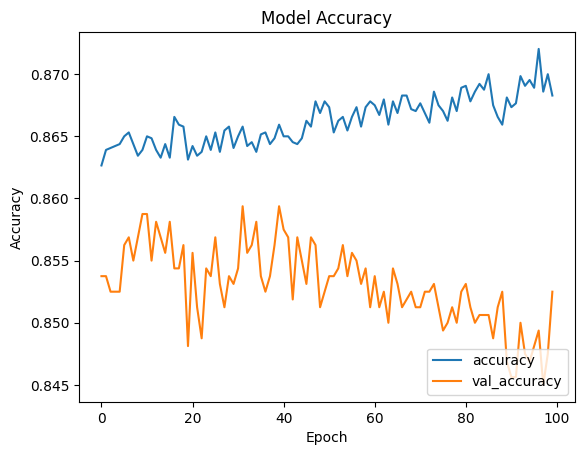

In [100]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'], label='accuracy')  # Plot training accuracy
plt.plot(his.history['val_accuracy'], label='val_accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Accuracy')  # Set y-axis label
plt.legend(loc='lower right')  # Add legend
plt.title('Model Accuracy')  # Set title for the plot

Text(0.5, 1.0, 'Model Loss')

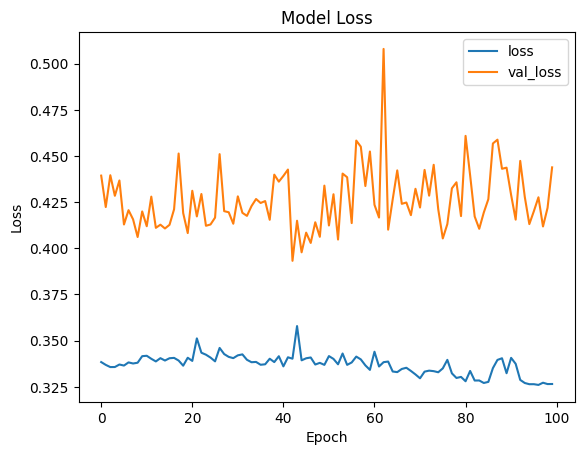

: 

In [ ]:
plt.plot(his.history['loss'], label='loss')  # Plot training loss
plt.plot(his.history['val_loss'], label='val_loss')  # Plot validation loss
plt.xlabel('Epoch')  # Set x-axis label
plt.ylabel('Loss')  # Set y-axis label
plt.legend(loc='upper right')  # Add legend
plt.title('Model Loss')  # Set title for the plot